# Tarea #1 Procesamiento y clasificación de datos | Alvaro Pequeño Mondragón 1726520

In [1]:
import pandas as pd
import numpy as np
from numpy import random
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Function to extract the text from PDF and transform it into a bag of words data frame

def PDFtextextract_tobow (pdfs_texts, n_grams):
    #pdfs_texts---->Input: list of PDF texts
    #pdfs_bow_df---->Returned value: Data frame of the pdfs bag of words
    
    vectorizer = CountVectorizer(stop_words='english', ngram_range= n_grams)
    vectorizer.fit(pdfs_texts)
    pdfs_bow = vectorizer.transform(pdfs_texts)
    pdfs_bow_df = pd.DataFrame(pdfs_bow.toarray(), columns=vectorizer.get_feature_names_out())
    
    return pdfs_bow_df

In [3]:
def BOWreduce(bow_df, Topn_words):
    #bow_df---->Input: Bag of Words dataframe
    #Topn_words---->Input: int of number of n words with most document appereances
    #bow_reduced---->Returned value: Data frame of the bag of words containing just the selected words

    document_appearances = bow_df[bow_df > 0].count() #Counts num of documents a word appears in
    top_document_appearances = document_appearances.nlargest(Topn_words, keep = 'all') #Gets the top n most appeared words
    top_words = top_document_appearances.index #Saves the top n words in a lst

    #Iterates through the words
    for word in top_words:
        keep_word = input('Keep "' + word + '"?  ') #Ask for user input if he wants to keep or remove the word

        #"y" means we want to keep the word any other series of characters means we want to delete it
        if keep_word != 'y': 
            top_document_appearances = top_document_appearances.drop(labels = [word]) #Drops word

    print(top_document_appearances)

    top_words = top_document_appearances.index #Gets the words that were kept
    bow_reduced = bow_df[top_words[0]] #Creates dataframe with the kept words
    top_words
    graph_data = top_document_appearances.copy().to_frame().reset_index()
    top_document_appearances = top_document_appearances.drop(labels = [top_words[0]]) #Drops item used to create dataframe
    top_words = top_document_appearances.index #Gets words without the dropped word

    for word in top_words:
        bow_reduced = pd.concat([bow_reduced, bow_df[word]], axis = 1) #Adds the pending words to the dataframe


    return bow_reduced, graph_data

Se leen los datos guardados en un excel con los textos de los documentos donde estan divididos en 2 categorias: Hojas de especificación y otros.

In [4]:
#Read the data containing the texts
Data = pd.read_csv('C:/Users/alvar/Documents/Maestria en Ciencia de datos/Aprendizaje profundo/Proyecto final/Archivos del proyecto/files_data_DL.csv')
Data

,pdf_texts,page_number,table_number,image_number,word_number,character_number,spec_in_url,doc_type,has_text
0,Accessories (Order Separately)\nMCCAPS – Wire ...,2,3,3,1324,7707,0,other,1
1,Project: \nLocation: \nCat.No: \nType: \nLamps...,1,3,2,837,5180,0,other,1
2,Description\nSoftglo LED night lights provide ...,2,7,6,720,4217,0,spec_sheet,1
3,TruGroove surface\nTruGroove_Surface_SpecShee...,9,18,19,4366,25714,0,spec_sheet,1
4,FEATURES & SPECIFICATIONS\nINTENDED USE — Rece...,3,3,7,1101,6734,1,spec_sheet,1
...,...,...,...,...,...,...,...,...,...
496,"LFR-4RD\nLITEFRAME 4"" ROUND DOWNLIGHT\ncurrent...",11,57,23,3637,21643,1,spec_sheet,1
497,Page 1\nS4LIP TUWH PENDANT PATTERNS 01/12/2...,7,18,4,2197,13961,1,spec_sheet,1
498,A\n_ _ _ _ _ _\n_ _ _ _ _ _\n_\nSHIELDING\nCRI...,5,17,4,2118,12693,1,spec_sheet,1
499,Rook 350 Square Pendants\n LIT-2216 • 0...,9,38,5,3726,20948,1,spec_sheet,1


Se dividen los datos en 2 dataframes correspondientes a cada una de las clases

In [5]:
hojas_spec = Data.loc[Data['doc_type'] == 'spec_sheet']
otros = Data.loc[Data['doc_type'] == 'other']

textos_hojas_spec = list(hojas_spec['pdf_texts'])
textos_otros = list(otros['pdf_texts'])

Se obtienen los bigramas presentes en todos los documentos por clase para ver si esto nos puede ayudar a distinguir entre documentos.

In [6]:
spec_bigramas = PDFtextextract_tobow(textos_hojas_spec, (2,2))
otros_bigramas = PDFtextextract_tobow(textos_otros, (2,2))

Se muestran los bigramas para las hojas de especificación y podemos observar que son un total de 391 documentos

In [23]:
spec_bigramas

,00 00,00 01,00 012,00 015,00 02,00 03,00 05,00 10,00 100,00 101,...,ﬂange ﬂange,ﬂat end,ﬂat solid,ﬂex low,ﬂexible metal,ﬂoor acgih,ﬂoor ceiling,ﬂoor connected,ﬂuorescent lamp,ﬂuorescent lighting
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,0,1,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Se muestran los bigramas para otros documentos y podemos observar que son un total de 110 documentos

In [24]:
otros_bigramas

,00 00,00 05,00 08,000 000,000 10,000 100,000 100w,000 12,000 120w,000 138,...,ﬁx tures,ﬁxed angle,ﬁxtures tampering,ﬂat surfaces,ﬂood narrow,ﬂoors undoubtedly,ﬂow operat,ﬂow operating,ﬂuid collection,ﬂuorescent lamp
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108,0,0,0,0,0,0,0,0,0,0,...,2,0,0,1,0,1,1,1,2,0


Se obtienen los top 10 bigramas que aparecen en las hojas de especificación.

In [7]:
top10_spec_bigramas, spec_bi_graph = BOWreduce(spec_bigramas, 10)

subject change     312
change notice      278
rights reserved    250
warranty year      220
000 hours          214
lumen output       212
consult factory    202
120 277v           173
10v dimming        172
120v 277v          172
dtype: int64


Se obtienen los top 10 bigramas que aparecen en otros documentos.

In [8]:
top10_otros_bigramas, otros_bi_graph = BOWreduce(otros_bigramas, 10)

rights reserved        93
subject change         91
north america          72
qty notes              71
281 hillmount          70
668 9008               70
800 668                70
america corporation    70
canada l6c             70
l6c 2s3                70
markham canada         70
respective owners      70
dtype: int64


Se grafican los top 10 bigramas de las hojas de especificación y el numero de documentos en los que aparecen

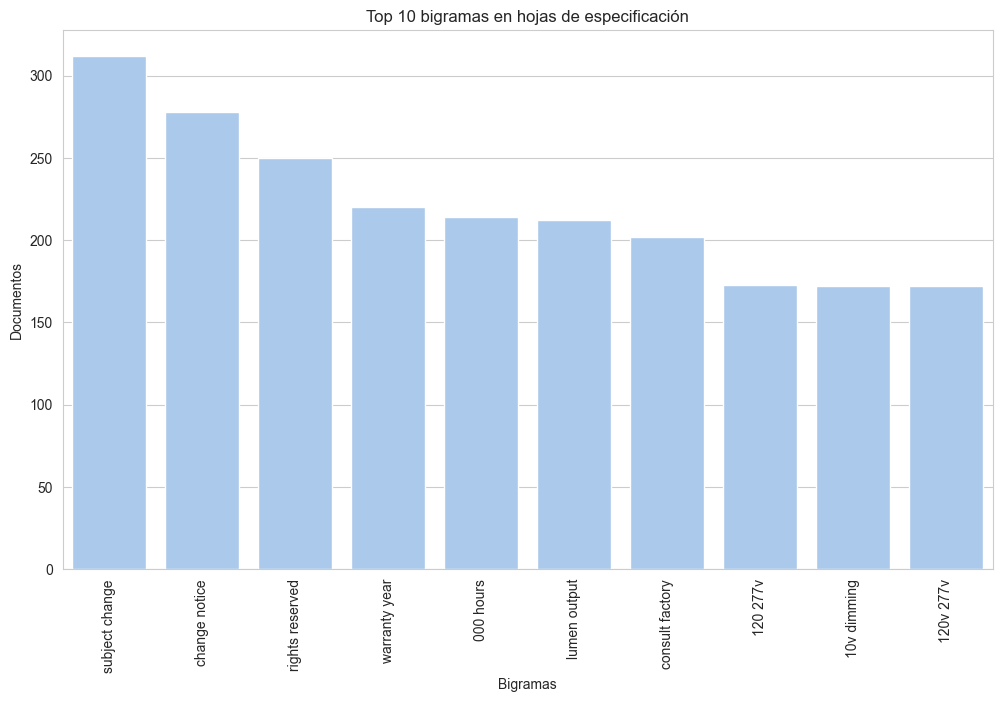

In [18]:
sns.set_palette("pastel")
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize = (12, 7))
ax.tick_params(axis='x', rotation=90)
sns.barplot(spec_bi_graph, x = 'index', y = 0, ax = ax).set(title = 'Top 10 bigramas en hojas de especificación', ylabel = 'Documentos', xlabel = 'Bigramas')
plt.show()

Se grafican los top 10 bigramas de otros documentos y el numero de documentos en los que aparecen

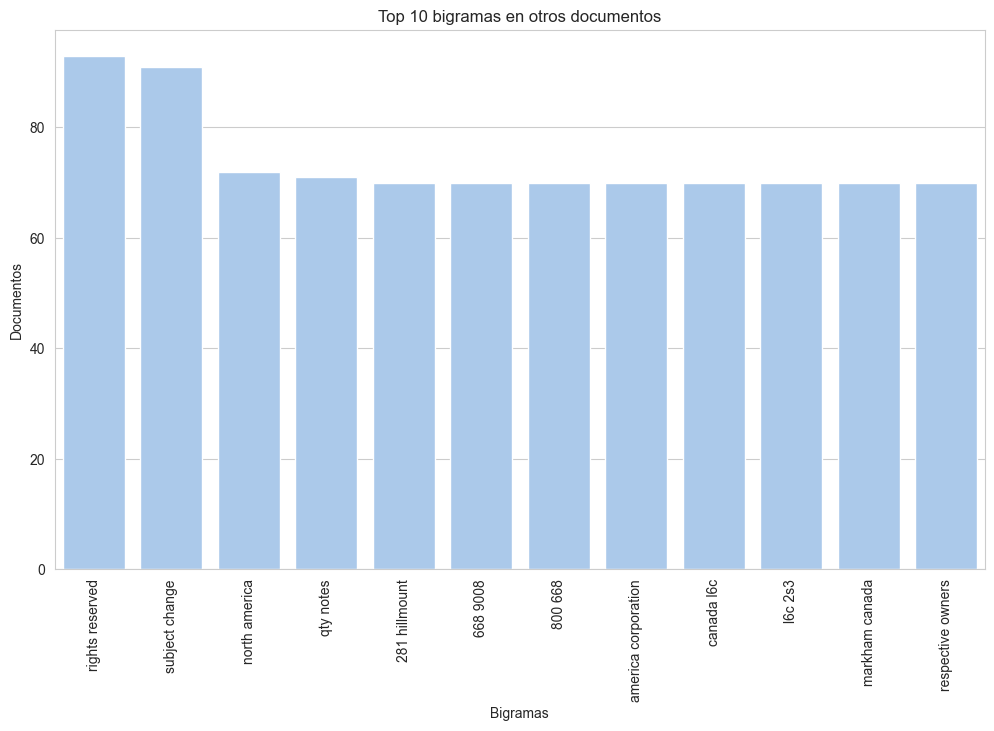

In [21]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.tick_params(axis='x', rotation=90)
sns.barplot(otros_bi_graph, x = 'index', y = 0).set(title = 'Top 10 bigramas en otros documentos', ylabel = 'Documentos', xlabel = 'Bigramas')
plt.show()

Se grafica el numero de palabras que contiene cada documento y se grafican por clase

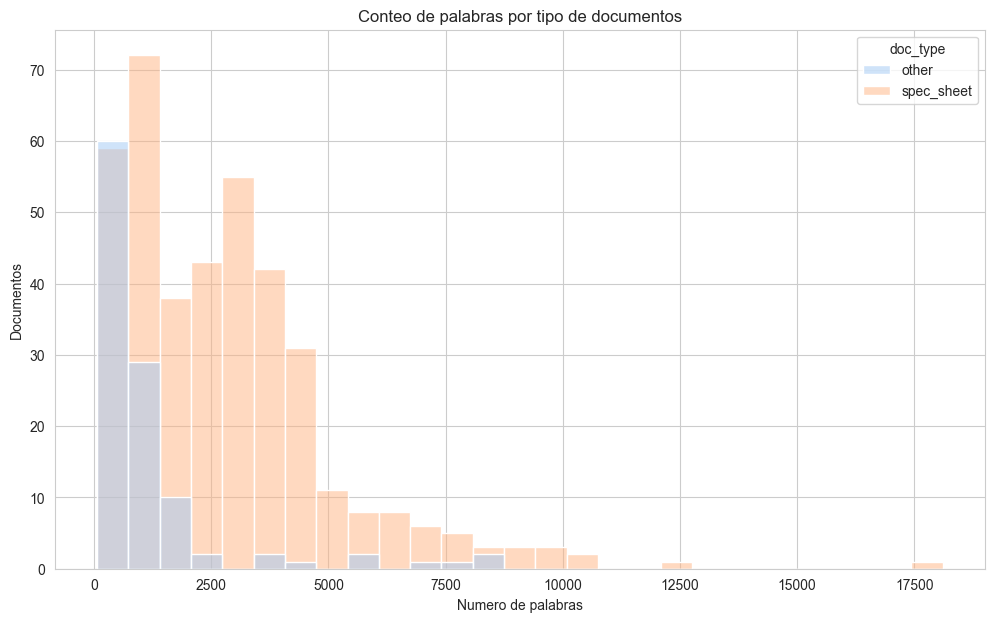

In [22]:
fig, ax = plt.subplots(figsize = (12, 7))
sns.histplot(data = Data, x = 'word_number', hue = 'doc_type').set(title = 'Conteo de palabras por tipo de documentos',xlabel='Numero de palabras', ylabel='Documentos')
plt.show()